# Sýnidæmi (vika 1)

Efni:
* Aðferð mesta bratta (gradient descent, GD)
* Stochastic gradient descent
* Línuleg aðhvarfsgreining

Athugum fyrst lágmörkun á fallinu $$f(\theta_0,\theta_1) = 4 \theta_0^2 - 4 \theta_0 \theta_1 + 3 \theta_1^2$$ með aðferð mesta bratta.

Stigullinn er $\nabla = (8 \theta_0 - 4 \theta_1, -4 \theta_0 + 6 \theta_1)$. Lággildispunktur er $\theta^* = (0,0)$.

In [1]:
import numpy as np
dt=np.zeros(2) # Define a vector with 2 elements to hold the gradient
t=np.array([1,1]) # Initia point
alpha=1 # Step length (may need to decrease)
maxiter=10

for iter in range(0,maxiter):
    # Gradient
    dt[0] = 8*t[0] - 4*t[1]
    dt[1] = -4*t[0] + 6*t[1]
    t = t-alpha*dt
    print(t)

[-3. -1.]
[17. -7.]
[-147.  103.]
[ 1441. -1103.]
[-14499.  11279.]
[ 146609. -114391.]
[-1483827.  1158391.]
[ 15020353. -11727263.]
[-1.52051523e+08  1.18717727e+08]
[ 1.53923157e+09 -1.20179473e+09]


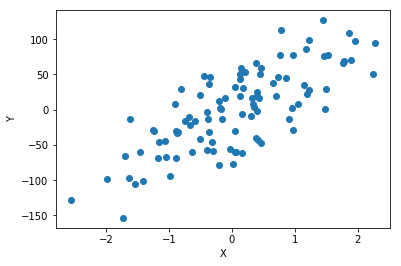

In [2]:
# REI602M : Linear regression example (11.1.2019)
import numpy as np
import matplotlib.pyplot as plt

# Load a simple regression dataset from a text file (csv format)
# Note: There are many ways to load data from files in Python (csvReader, csvDictReader, Pandas, ...)
data=np.genfromtxt('simple_linear.csv', delimiter=',', skip_header=1) # Columns: x, y
n=data.shape[0]

# Construct data matrix for linear regression
# Model: y= θ_0 + θ_1*x_1 + ... + θ_p*x_p
y=data[:,-1] # Output variable is in the last column in this case

# Append a column of ones to the inputs (intercept term)
X=np.c_[np.ones(n), data[:,0:-1]] # Include all columns from 'data' except the last
np.set_printoptions(suppress=True, precision=4) # Formatting of output

# Visalize data
plt.scatter(X[:,1],y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [3]:
# Obtain exact regression coefficients by solving the normal equations, X'Xθ = X'y
theta_ex = np.linalg.solve(X.T.dot(X), X.T.dot(y))
print('Exact solution: theta=', theta_ex)

Exact solution: theta= [-2.8497 43.2041]


In [53]:
# Stochastic gradient descent (basic implementation)
p=X.shape[1]
theta=np.zeros(p)
alpha=0.001   # May have to be decreased
maxiter=1000  # May have to be increased
for iter in range(0,maxiter):
    i = np.random.randint(n) # Select one training example uniformly at random
    error = np.dot(theta,X[i,:]) - y[i]
    for j in range(0,p):
        theta[j] = theta[j] - alpha*error*X[i,j]
print('SGD approximation:', theta)

SGD approximation: [-0.1927 26.7796]


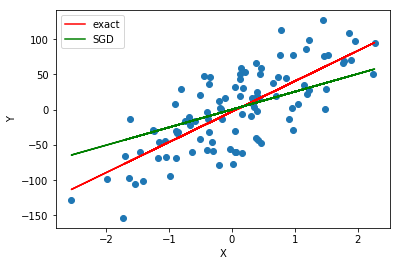

In [5]:
# Visalize data and model predictions
plt.scatter(X[:,1],y)
plt.xlabel('X')
plt.ylabel('Y')

plt.plot(X[:,1], (theta_ex[0] + theta_ex[1]*X[:,1]),c='r', label='exact')
plt.plot(X[:,1], (theta[0] + theta[1]*X[:,1]),c='g', label='SGD')
plt.legend()
plt.show()